In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [2]:
# load data
rawData = pd.read_csv("data/AMD.csv", header=None)

df = rawData[0].str.split(",", expand=True)

df.head()

,0,1,2,3,4,5,6,7,8
0,Date,None,None,None,None,None,None,None,None
1,1980-03-17 00:00:00-05:00,"""3.125""","""3.3020830154418945""","""3.125""","""3.1458330154418945""","""219600""","""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""
2,1980-03-18 00:00:00-05:00,"""3.125""","""3.125""","""2.9375""","""3.03125""","""727200""","""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""
3,1980-03-19 00:00:00-05:00,"""3.03125""","""3.0833330154418945""","""3.0208330154418945""","""3.0416669845581055""","""295200""","""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""
4,1980-03-20 00:00:00-05:00,"""3.0416669845581055""","""3.0625""","""3.0104169845581055""","""3.0104169845581055""","""159600""","""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""


In [3]:
# Fix column names
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "ticker", "name1", "name2"]

for col in ["Open", "High", "Low", "Close", "Volume"]:
    df[col] = df[col].str.replace('"', '').astype(float)

df["Date"] = pd.to_datetime(df["Date"].str.replace('"', '').str.strip(), errors="coerce")

df.head()

/var/folders/_q/9bb35y7928b8cwm8khhrd7900000gn/T/ipykernel_48079/2629125254.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"].str.replace('"', '').str.strip(), errors="coerce")


,Date,Open,High,Low,Close,Volume,ticker,name1,name2
0,NaT,NaN,NaN,NaN,NaN,NaN,None,None,None
1,1980-03-17 00:00:00-05:00,3.125000,3.302083,3.125000,3.145833,219600.0,"""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""
2,1980-03-18 00:00:00-05:00,3.125000,3.125000,2.937500,3.031250,727200.0,"""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""
3,1980-03-19 00:00:00-05:00,3.031250,3.083333,3.020833,3.041667,295200.0,"""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""
4,1980-03-20 00:00:00-05:00,3.041667,3.062500,3.010417,3.010417,159600.0,"""AMD""","""Advanced Micro Devices","Inc. (AMD) Historical Data"""


In [4]:
# Drop unnecessary columns
df = df.drop(columns=["ticker", "name1", "name2"], errors="ignore")
# Drop first row
df = df.drop(index=df.index[0])

df.head()

,Date,Open,High,Low,Close,Volume
1,1980-03-17 00:00:00-05:00,3.125000,3.302083,3.125000,3.145833,219600.0
2,1980-03-18 00:00:00-05:00,3.125000,3.125000,2.937500,3.031250,727200.0
3,1980-03-19 00:00:00-05:00,3.031250,3.083333,3.020833,3.041667,295200.0
4,1980-03-20 00:00:00-05:00,3.041667,3.062500,3.010417,3.010417,159600.0
5,1980-03-21 00:00:00-05:00,3.010417,3.020833,2.906250,2.916667,130800.0


In [5]:
print(df["Date"].head())
print(df["Date"].dtype)

1    1980-03-17 00:00:00-05:00
2    1980-03-18 00:00:00-05:00
3    1980-03-19 00:00:00-05:00
4    1980-03-20 00:00:00-05:00
5    1980-03-21 00:00:00-05:00
Name: Date, dtype: object
object


In [6]:
# Take the meaningful part of date column
df["Date"] = df["Date"].astype(str).str.slice(0, 10)

# to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

print(df["Date"].head())

1   1980-03-17
2   1980-03-18
3   1980-03-19
4   1980-03-20
5   1980-03-21
Name: Date, dtype: datetime64[ns]


In [7]:
df = df.set_index("Date")

df.head()


,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17,3.125000,3.302083,3.125000,3.145833,219600.0
1980-03-18,3.125000,3.125000,2.937500,3.031250,727200.0
1980-03-19,3.031250,3.083333,3.020833,3.041667,295200.0
1980-03-20,3.041667,3.062500,3.010417,3.010417,159600.0
1980-03-21,3.010417,3.020833,2.906250,2.916667,130800.0


In [8]:
df1 = df.loc["2020-01-01":"2024-12-31"]

df_backup = df1.copy()

print(df1.head())
print(df1.tail())
print(df1.shape)

                 Open       High        Low      Close      Volume
Date                                                              
2020-01-02  46.860001  49.250000  46.630001  49.099998  80331100.0
2020-01-03  48.029999  49.389999  47.540001  48.599998  73127400.0
2020-01-06  48.020000  48.860001  47.860001  48.389999  47934900.0
2020-01-07  49.349998  49.389999  48.040001  48.250000  58061400.0
2020-01-08  47.849998  48.299999  47.139999  47.830002  53767000.0
                  Open        High         Low       Close      Volume
Date                                                                  
2024-12-24  127.510002  127.510002  124.660004  126.290001  24829600.0
2024-12-26  125.519997  127.300003  125.050003  125.059998  24998200.0
2024-12-27  124.370003  126.180000  122.260002  125.190002  32924000.0
2024-12-30  123.559998  124.099998  122.349998  122.440002  30501600.0
2024-12-31  123.099998  123.550003  120.139999  120.790001  30203400.0
(1258, 5)


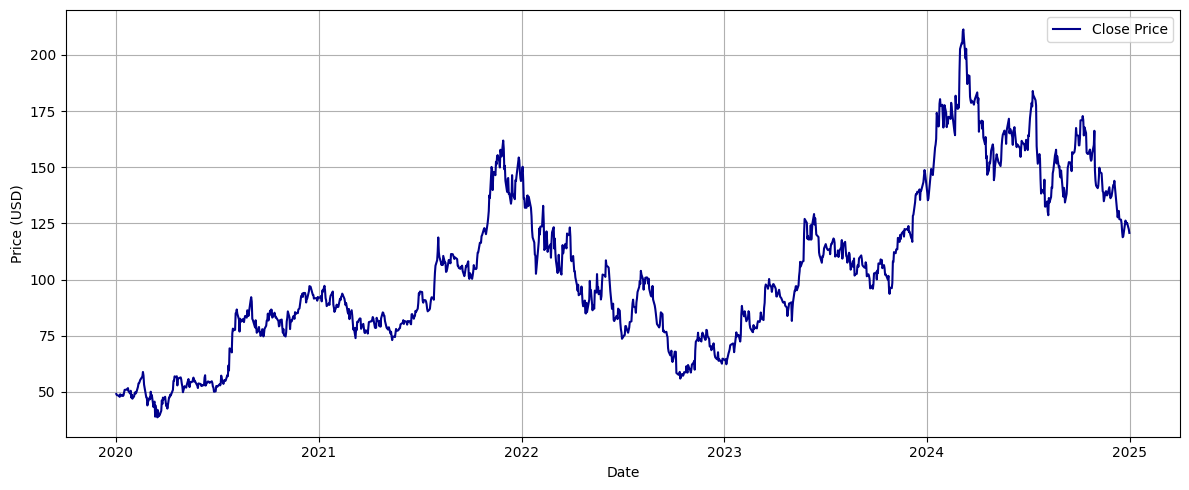

In [9]:
# Close price
plt.figure(figsize=(12,5))
plt.plot(df1["Close"], label="Close Price", color="darkblue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("fig/amd_close_price.png", dpi=300) 
plt.show()

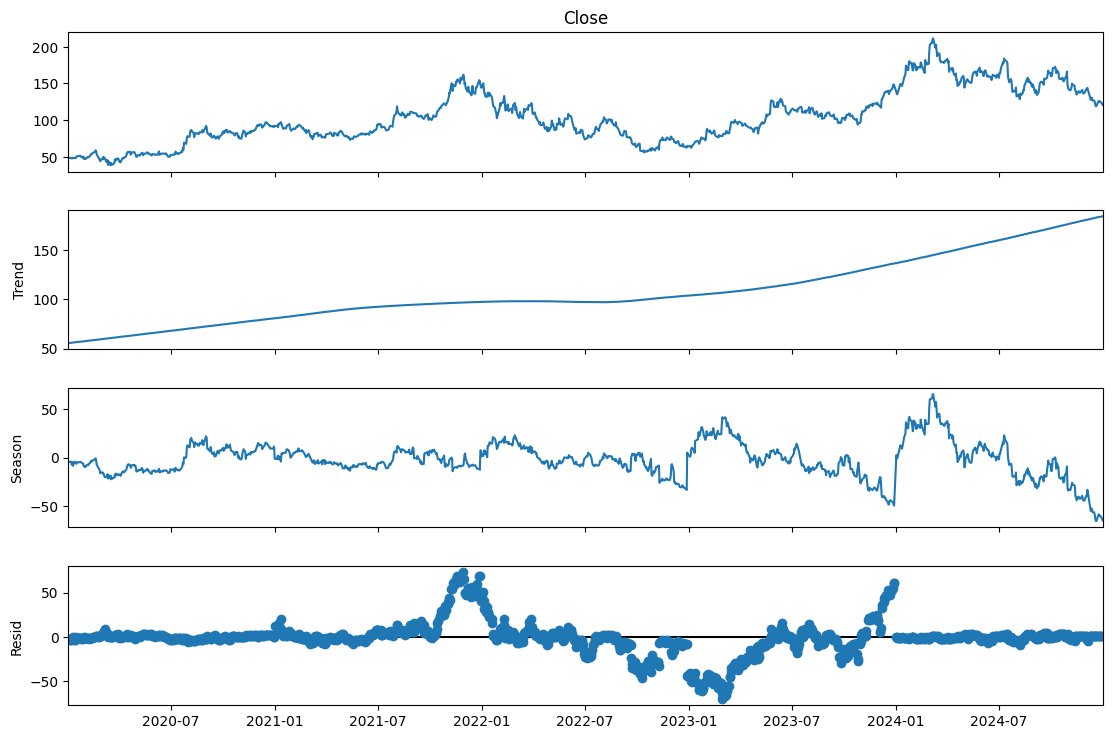

In [10]:
stl = STL(df1["Close"], period=252, robust=True)
res = stl.fit()

fig = res.plot()
fig.set_size_inches(12, 8)
# plt.suptitle("STL Decomposition of AMD", fontsize=12)
fig.savefig("fig/STL_Decomposition_AMD_2020_2024.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
df1.to_csv("data/AMD_cleaned.csv", index=True) # clean data can be used directly